# NEST Benchmarks

We have run the following benchmarks:
- Synthetic benchmarks
  - HPC bencmark.
  - HPC bencmark split into many `Connect` calls.
    - One where we time each connection 'bulk' to get connections/second
    - One where we time all connections together, like in the normal HPC benchmark.
  - HPC benchmark where we use the same connection rule for all `Connect` calls (`one_to_one`, `all_to_all`, `fixed_indegree`, `fixed_outdegree`, `fixed_total_number`, `pairwise_bernoulli` and `symmetric_pairwise_bernoulli`) and compute connections/second.
- Realistic benchmarks
  - Multi-area-model
    - See https://github.com/INM-6/multi-area-model
  - 4x4 Mesocircuit model
    - See https://github.com/INM-6/4x4mm2LFP/tree/master


### Specifications

All of the benchmarks were run with the following number of nodes, VPs, scales, threads:

| Nodes | VPs | Scale - hpc | Scale - MAM | Scale - 4x4 | Threads |
|:-----:|:---:|:-----------:|:-----------:|:-----------:|:-------:|
|   1   |  24 |      20     |    0.0625   |    0.0625   |1,4,8,12 |
|   2   |  48 |      40     |    0.125    |    0.125    |1,4,8,12 |
|   4   |  96 |      80     |    0.25     |    0.25     |1,4,8,12 |
|   8   | 192 |     160     |    0.5      |    0.5      |1,4,8,12 |
|   16  | 384 |     320     |    1.0      |    1.0      |1,4,8,12 |


**Hardware:**
All benchmarks are run on Piz Daint. We used the multicore XC40 Intel Broadwell 2 x 18-core nodes (XC40 Compute Nodes, with two Intel® Xeon® E5-2695 v4 @ 2.10GHz (2 x 18 cores, 64/128 GB RAM))

**NEST:**
NEST git hash: `91b3fa71`
https://github.com/nest/nest-simulator/tree/91b3fa71056d159eaef884e78908cfc6cb2ce431

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
hpc_path = f'results/hpc_benchmark_2_16_1_daint_strict_thread_*.csv'

hpc_split_path = f'results/hpc_benchmark_2_16_1_daint_strict_split_thread_*.csv'
hpc_split_new_path = f'results/hpc_benchmark_2_16_1_daint_strict_split_new_thread_*.csv'

hpc_one_path = f'results/hpc_benchmark_2_16_1_daint_strict_one_thread_*.csv'
hpc_all_path = f'results/hpc_benchmark_2_16_1_daint_strict_all_thread_*.csv'
hpc_in_path = f'results/hpc_benchmark_2_16_1_daint_strict_in_thread_*.csv'
hpc_out_path = f'results/hpc_benchmark_2_16_1_daint_strict_out_thread_*.csv'
hpc_tot_path = f'results/hpc_benchmark_2_16_1_daint_strict_tot_thread_*.csv'
hpc_bern_path = f'results/hpc_benchmark_2_16_1_daint_strict_bern_thread_*.csv'
hpc_bern_sym_path = f'results/hpc_benchmark_2_16_1_daint_strict_sym-bern_thread_*.csv'

mam_path = f'results/multi-area-model_2_16_1_daint_strict_thread_*.csv'

mesocircuit_path = f'results/4x4_mesocircuit_2_16_1_daint_strict_thread_*.csv'

# HPC benchmark

In [65]:
hpc_res = pd.concat([pd.read_csv(bench)
                     for bench in glob.glob(hpc_path)])

In [ ]:
print(hpc_res)

**Find Connection time:**

In [66]:
hpc_res['T_bld_xn'] = hpc_res['T_conns_min'] + hpc_res['T_ini_max']
hpc_res['T_bld_nx'] = hpc_res['T_conns_max'] + hpc_res['T_ini_min']

hpc_res['T_bld'] = hpc_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

In [73]:
hpc_pres = pd.pivot_table(hpc_res, index=['THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                      values=['T_bld', 'T_sim', 'VSize_sum', 'SCALE'])

In [68]:
hpc_pres

SCALE    T_bld   VSize_sum
THREADS_PER_TASK NUMBER_OF_NODES                            
1                1                   20   60.655   117612120
                 2                   40   72.240   254238928
                 4                   80   75.030   508691560
                 8                  160   67.410  1134139288
                 16                 320   81.830  2097372280
3                1                   20   93.280   109314720
                 8                  160  100.870   993400984
4                1                   20  130.775   106329306
                 2                   40  150.260   211971568
                 4                   80  151.660   433026952
                 8                  160  138.950   947933736
                 16                 320  174.030  1909198328
6                1                   20  114.590   106362192
                 8                  160  122.940   879023896
8                1                   20  175.350   104941020
                 2                   40  196.370   207634176
                 4                   80  204.540   416155432
                 8                  160  217.330   852823288
                 16                 320  238.310  1888055032
9                1                   20  136.650   105655064
                 8                  160  147.050   864894848
12               1                   20  199.760   103576260
                 2                   40  234.330   203051508
                 4                   80  233.600   406860456
                 8                  160  256.860   838010712
                 16                 320  295.410  1882060152
18               1                   20  190.860   106068948
                 8                  160  239.340   858372308

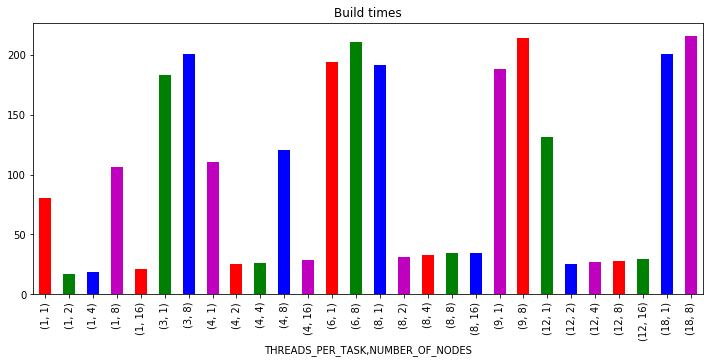

In [74]:
hpc_pres['T_sim'].plot(kind='bar', title='Build times',
                       color = ['r', 'g', 'b', 'm']*int(len(hpc_pres)/4), figsize=(12,5))

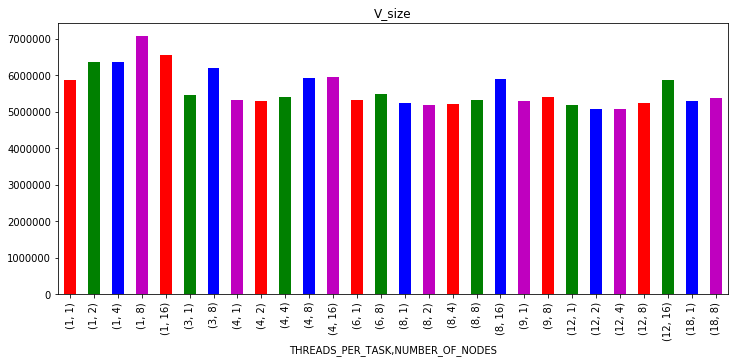

In [70]:
(hpc_pres['VSize_sum']/hpc_pres['SCALE']).plot(kind='bar', title='V_size',
                           color = ['r', 'g', 'b', 'm']*int(len(hpc_pres)/4), figsize=(12,5))

In [ ]:
1882060152/1024**2/16

## HPC Benchmark - test threads

In [60]:
hpc_thread_res = pd.read_csv('results/hpc_benchmark_2_16_1_daint_strict_thread_all.csv')
hpc_thread_res

,NUMBER_OF_NODES,TASKS_PER_NODE,THREADS_PER_TASK,NUM_VPS,SCALE,PLASTIC,T_nrns,T_conns_min,T_conns_max,T_ini_min,T_ini_max,T_equ,T_sim,VSize_sum,N_spks_sum,Rate_sum,N_nrns,N_conns_sum,d_min,d_max
0,8,36,1,288,160,True,0.50,24.64,26.48,30.50,32.36,10.61,192.97,1222915480,12512534,6.851,1800000,20251801000,1.5,1.5
1,8,12,3,288,160,True,0.28,43.72,52.70,48.23,57.15,14.29,200.62,993400984,12507695,6.875,1800000,20251801000,1.5,1.5
2,8,9,4,288,160,True,0.30,52.82,58.14,57.05,62.37,15.78,215.01,989935288,12512534,6.851,1800000,20251801000,1.5,1.5
3,8,6,6,288,160,True,0.42,57.28,62.36,60.58,65.66,14.95,210.50,879023896,12512534,6.851,1800000,20251801000,1.5,1.5
4,8,4,9,288,160,True,0.46,64.50,71.48,75.58,82.55,16.01,213.62,864894848,12512534,6.851,1800000,20251801000,1.5,1.5
5,8,2,18,288,160,True,0.90,86.99,98.33,141.01,152.35,15.48,215.94,858372308,12512534,6.851,1800000,20251801000,1.5,1.5


In [61]:
hpc_thread_res['T_bld_xn'] = hpc_thread_res['T_conns_min'] + hpc_thread_res['T_ini_max']
hpc_thread_res['T_bld_nx'] = hpc_thread_res['T_conns_max'] + hpc_thread_res['T_ini_min']

hpc_thread_res['T_bld'] = hpc_thread_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

hpc_thread_res['T_sim']

0    192.97
1    200.62
2    215.01
3    210.50
4    213.62
5    215.94
Name: T_sim, dtype: float64

In [62]:
hpc_thread_res = pd.pivot_table(hpc_thread_res, index=['SCALE', 'THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                values=['T_bld', 'T_conns_min','T_ini_min', 'VSize_sum', 'T_sim'])
hpc_thread_res

T_bld  T_conns_min  T_ini_min  \
SCALE THREADS_PER_TASK NUMBER_OF_NODES                                   
160   1                8                 56.98        24.64      30.50   
      3                8                100.87        43.72      48.23   
      4                8                115.19        52.82      57.05   
      6                8                122.94        57.28      60.58   
      9                8                147.05        64.50      75.58   
      18               8                239.34        86.99     141.01   

                                         T_sim   VSize_sum  
SCALE THREADS_PER_TASK NUMBER_OF_NODES                      
160   1                8                192.97  1222915480  
      3                8                200.62   993400984  
      4                8                215.01   989935288  
      6                8                210.50   879023896  
      9                8                213.62   864894848  
      18               8                215.94   858372308

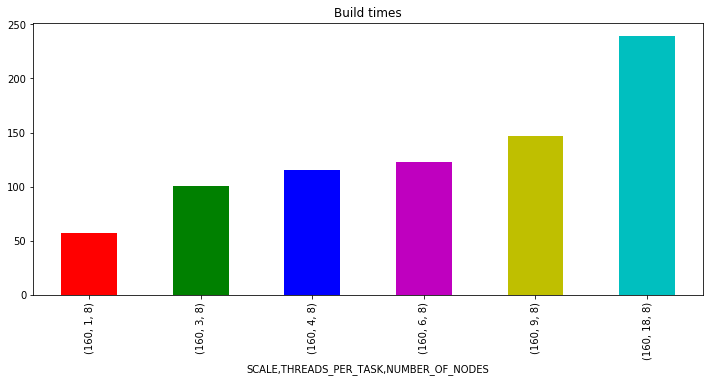

In [14]:
hpc_thread_res['T_bld'].plot(kind='bar', title='Build times',
                             color = ['r', 'g', 'b', 'm', 'y', 'c', 'C0', 'C1']*int(len(hpc_thread_res)/6),
                             figsize=(12,5))

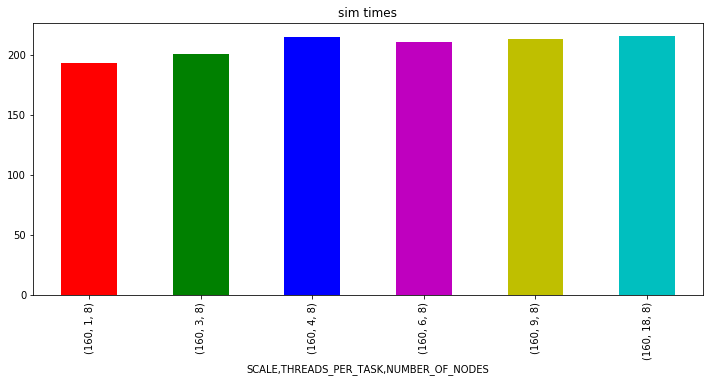

In [16]:
hpc_thread_res['T_sim'].plot(kind='bar', title='sim times',
                             color = ['r', 'g', 'b', 'm', 'y', 'c', 'C0', 'C1']*int(len(hpc_thread_res)/6),
                             figsize=(12,5))

In [ ]:
hpc_thread_res['VSize_sum'].plot(kind='bar', title='V_size',
                                 color = ['r', 'g', 'b', 'm', 'y', 'c', 'C0', 'C1']*int(len(hpc_thread_res)/6),
                                 figsize=(12,5))

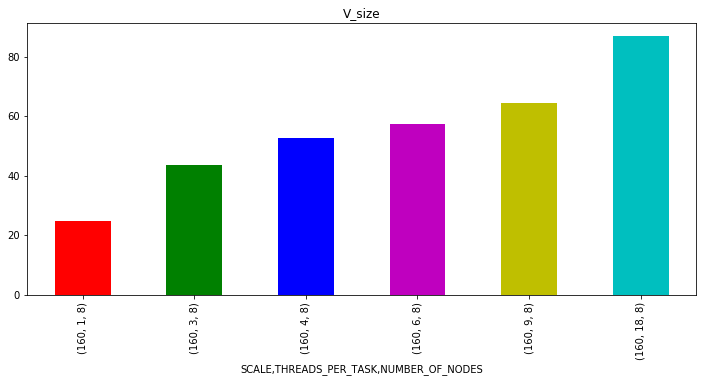

In [63]:
hpc_thread_res['T_conns_min'].plot(kind='bar', title='V_size',
                                 color = ['r', 'g', 'b', 'm', 'y', 'c', 'C0', 'C1']*int(len(hpc_thread_res)/6),
                                 figsize=(12,5))

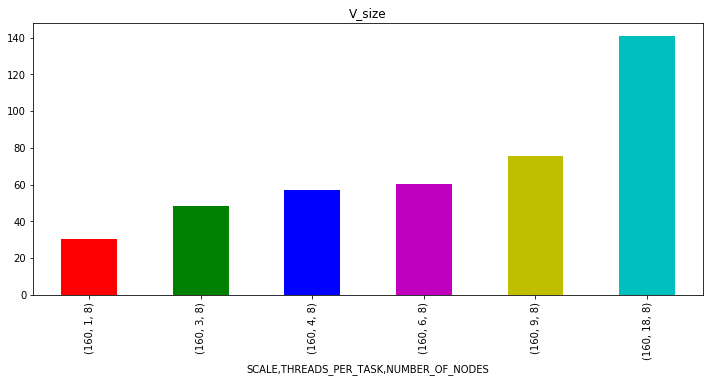

In [64]:
hpc_thread_res['T_ini_min'].plot(kind='bar', title='V_size',
                                 color = ['r', 'g', 'b', 'm', 'y', 'c', 'C0', 'C1']*int(len(hpc_thread_res)/6),
                                 figsize=(12,5))

### NODE = 1, SCALE = 20, VPs = 36

In [ ]:
hpc_thread_node1_res = pd.read_csv('results/hpc_benchmark_2_16_1_daint_strict_thread_all_node1.csv')
hpc_thread_node1_res

In [ ]:
hpc_thread_node1_res['T_bld_xn'] = hpc_thread_node1_res['T_conns_min'] + hpc_thread_node1_res['T_ini_max']
hpc_thread_node1_res['T_bld_nx'] = hpc_thread_node1_res['T_conns_max'] + hpc_thread_node1_res['T_ini_min']

hpc_thread_node1_res['T_bld'] = hpc_thread_node1_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

hpc_thread_node1_res['T_sim']

In [ ]:
hpc_thread_node1_res = pd.pivot_table(hpc_thread_node1_res, index=['SCALE', 'THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                      values=['T_bld', 'VSize_sum', 'T_sim'])
hpc_thread_node1_res

In [ ]:
hpc_thread_node1_res['T_bld'].plot(kind='bar', title='Build times',
                                   color = ['r', 'g', 'b', 'm', 'y', 'c', 'C0', 'C1']*int(len(hpc_thread_res)/8),
                                   figsize=(12,5))

## No Jemalloc

In [23]:
hpc_thread_noJe_res = pd.read_csv('results/hpc_benchmark_2_16_1_daint_strict_noJe_thread_all.csv')
#print(hpc_thread_noJe_res)

hpc_thread_noJe_res['T_bld_xn'] = hpc_thread_noJe_res['T_conns_min'] + hpc_thread_noJe_res['T_ini_max']
hpc_thread_noJe_res['T_bld_nx'] = hpc_thread_noJe_res['T_conns_max'] + hpc_thread_noJe_res['T_ini_min']

hpc_thread_noJe_res['T_bld'] = hpc_thread_noJe_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

print(hpc_thread_noJe_res['T_sim'])

hpc_thread_noJe_res = pd.pivot_table(hpc_thread_noJe_res, index=['SCALE', 'THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                     values=['T_bld', 'VSize_sum', 'T_sim'])
hpc_thread_noJe_res

0    159.97
1    200.43
2    214.63
3    209.40
4    207.77
5    211.09
Name: T_sim, dtype: float64


T_bld   T_sim  VSize_sum
SCALE THREADS_PER_TASK NUMBER_OF_NODES                           
160   1                8                 58.52  159.97  987499260
      3                8                 98.84  200.43  796523824
      4                8                117.00  214.63  781575668
      6                8                126.40  209.40  741658636
      9                8                142.72  207.77  728784396
      18               8                220.84  211.09  730957964

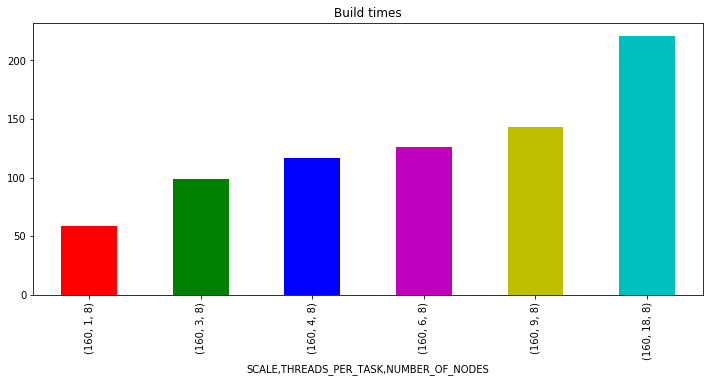

In [25]:
hpc_thread_noJe_res['T_bld'].plot(kind='bar', title='Build times',
                                  color = ['r', 'g', 'b', 'm', 'y', 'c', 'C0', 'C1']*int(len(hpc_thread_res)/6),
                                  figsize=(12,5))

## Temalloc

In [26]:
hpc_thread_te_res = pd.read_csv('results/hpc_benchmark_2_16_1_daint_strict_te_thread_all.csv')
# print(hpc_thread_te_res)

hpc_thread_te_res['T_bld_xn'] = hpc_thread_te_res['T_conns_min'] + hpc_thread_te_res['T_ini_max']
hpc_thread_te_res['T_bld_nx'] = hpc_thread_te_res['T_conns_max'] + hpc_thread_te_res['T_ini_min']

hpc_thread_te_res['T_bld'] = hpc_thread_te_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

print(hpc_thread_te_res['T_sim'])

hpc_thread_te_res = pd.pivot_table(hpc_thread_te_res, index=['SCALE', 'THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                     values=['T_bld', 'VSize_sum', 'T_sim'])
hpc_thread_te_res

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: T_sim, dtype: float64


Empty DataFrame
Columns: []
Index: [(160, 1, 8), (160, 3, 8), (160, 4, 8), (160, 6, 8), (160, 9, 8), (160, 18, 8)]

In [27]:
hpc_thread_te_res['T_bld'].plot(kind='bar', title='Build times',
                                color = ['r', 'g', 'b', 'm', 'y', 'c', 'C0', 'C1']*int(len(hpc_thread_te_res)/6),
                                figsize=(12,5))

KeyError: 'T_bld'

## NEST 2.14

In [32]:
hpc_thread_214_res = pd.read_csv('results/hpc_benchmark_2_14_daint_strict_thread_all.csv')
print(hpc_thread_214_res)

hpc_thread_214_res['T_bld_xn'] = hpc_thread_214_res['T_conns_min'] + hpc_thread_214_res['T_ini_max']
hpc_thread_214_res['T_bld_nx'] = hpc_thread_214_res['T_conns_max'] + hpc_thread_214_res['T_ini_min']

hpc_thread_214_res['T_bld'] = hpc_thread_214_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

print(hpc_thread_214_res['T_sim'])

hpc_thread_214_res = pd.pivot_table(hpc_thread_214_res, index=['SCALE', 'THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                     values=['T_bld', 'VSize_sum', 'T_sim'])
hpc_thread_214_res

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  NUM_VPS  SCALE  PLASTIC  \
0                8              36                 1      288    160     True   
1                8              12                 3      288    160     True   
2                8               9                 4      288    160     True   
3                8               6                 6      288    160     True   
4                8               4                 9      288    160     True   
5                8               2                18      288    160     True   

   T_nrns  T_conns_min  T_conns_max  T_ini_min  T_ini_max  T_equ   T_sim  \
0    0.57        56.86        60.96       1.07       5.16   9.85  175.29   
1    0.32        73.37        81.03       1.48       9.15  13.80  198.61   
2    0.91        76.12        84.61       1.52      10.01  14.96  211.80   
3    1.10        78.56        84.71       1.42       7.58  14.38  205.20   
4    0.55        79.70        83.56       1.53      

T_bld   T_sim   VSize_sum
SCALE THREADS_PER_TASK NUMBER_OF_NODES                           
160   1                8                62.02  175.29  1105554108
      3                8                82.51  198.61  1011344880
      4                8                86.13  211.80  1004404680
      6                8                86.13  205.20   998987952
      9                8                85.09  204.98   995817752
      18               8                89.27  208.15  1003855384

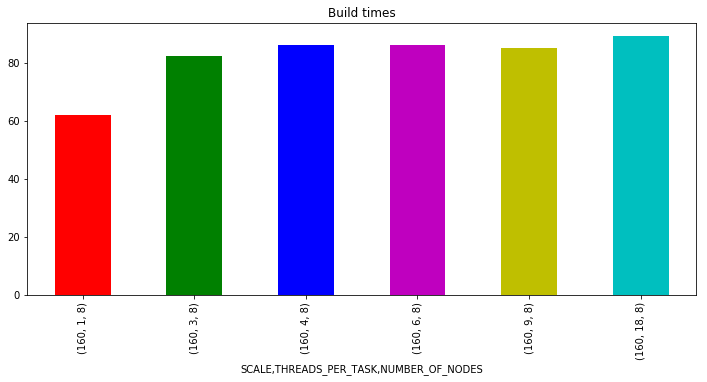

In [29]:
hpc_thread_214_res['T_bld'].plot(kind='bar', title='Build times',
                                 color = ['r', 'g', 'b', 'm', 'y', 'c', 'C0', 'C1']*int(len(hpc_thread_214_res)/6),
                                 figsize=(12,5))

### NEST 2.16.1 og NEST 2.14

In [47]:
hpc_2_14 = pd.read_csv('results/hpc_benchmark_2_14_daint_strict_thread_all.csv')
hpc_2_14['version'] = ['2.14']*6
hpc_2_16_1 = pd.read_csv('results/hpc_benchmark_2_16_1_daint_strict_thread_all.csv')
hpc_2_16_1['version'] = ['2.16.1']*6

hpc_thread_214_216_res = pd.concat([hpc_2_14, hpc_2_16_1])

#print(hpc_thread_214_216_res)

hpc_thread_214_216_res['T_bld_xn'] = hpc_thread_214_216_res['T_conns_min'] + hpc_thread_214_216_res['T_ini_max']
hpc_thread_214_216_res['T_bld_nx'] = hpc_thread_214_216_res['T_conns_max'] + hpc_thread_214_216_res['T_ini_min']

hpc_thread_214_216_res['T_bld'] = hpc_thread_214_216_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

print(hpc_thread_214_216_res['T_sim'])

hpc_thread_214_216_res = pd.pivot_table(hpc_thread_214_216_res, index=['SCALE', 'THREADS_PER_TASK', 'version', 'NUMBER_OF_NODES'],
                                     values=['T_bld', 'VSize_sum', 'T_sim'])
hpc_thread_214_216_res

0    175.29
1    198.61
2    211.80
3    205.20
4    204.98
5    208.15
0    192.97
1    200.62
2    215.01
3    210.50
4    213.62
5    215.94
Name: T_sim, dtype: float64


T_bld   T_sim   VSize_sum
SCALE THREADS_PER_TASK version NUMBER_OF_NODES                            
160   1                2.14    8                 62.02  175.29  1105554108
                       2.16.1  8                 56.98  192.97  1222915480
      3                2.14    8                 82.51  198.61  1011344880
                       2.16.1  8                100.87  200.62   993400984
      4                2.14    8                 86.13  211.80  1004404680
                       2.16.1  8                115.19  215.01   989935288
      6                2.14    8                 86.13  205.20   998987952
                       2.16.1  8                122.94  210.50   879023896
      9                2.14    8                 85.09  204.98   995817752
                       2.16.1  8                147.05  213.62   864894848
      18               2.14    8                 89.27  208.15  1003855384
                       2.16.1  8                239.34  215.94   858372308

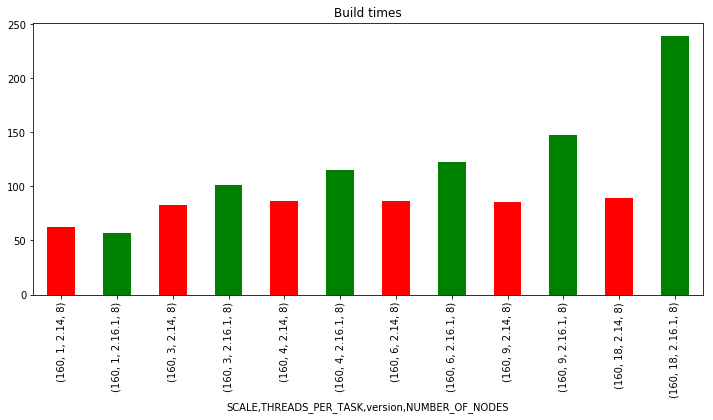

In [49]:
hpc_thread_214_216_res['T_bld'].plot(kind='bar', title='Build times',
                                     color = ['r', 'g']*int(len(hpc_thread_214_216_res)/2),
                                     figsize=(12,5))

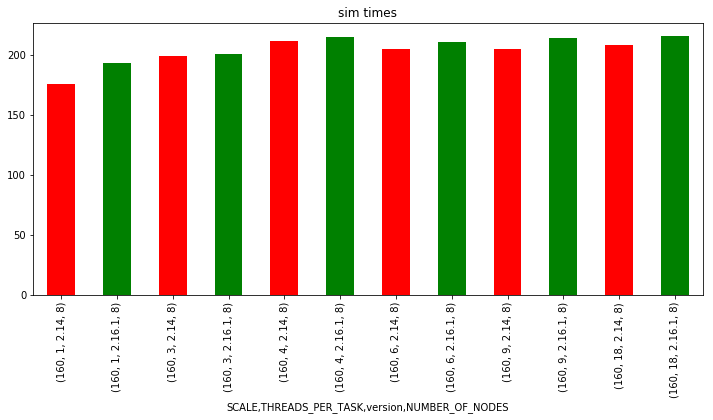

In [50]:
hpc_thread_214_216_res['T_sim'].plot(kind='bar', title='sim times',
                                     color = ['r', 'g']*int(len(hpc_thread_214_216_res)/2),
                                     figsize=(12,5))

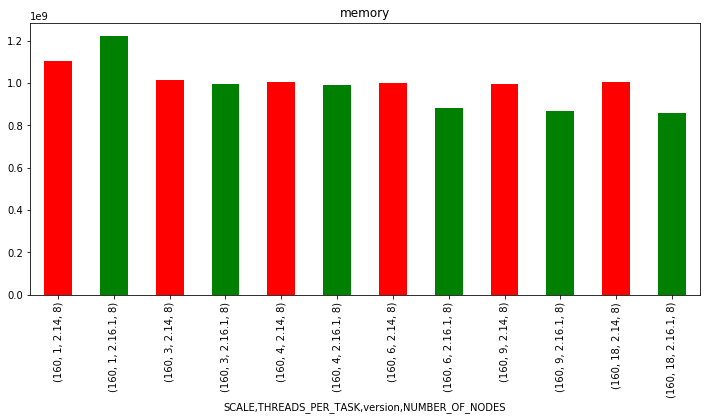

In [52]:
hpc_thread_214_216_res['VSize_sum'].plot(kind='bar', title='memory',
                                         color = ['r', 'g']*int(len(hpc_thread_214_216_res)/2),
                                         figsize=(12,5))

## NEST 2.16

Out of memory for scale = 20. Have therefore used **SCALE=10**.

In [30]:
hpc_thread_216_res = pd.read_csv('results/hpc_benchmark_2_16_daint_strict_thread_all.csv')
# print(hpc_thread_216_res)

hpc_thread_216_res['T_bld_xn'] = hpc_thread_216_res['T_conns_min'] + hpc_thread_216_res['T_ini_max']
hpc_thread_216_res['T_bld_nx'] = hpc_thread_216_res['T_conns_max'] + hpc_thread_216_res['T_ini_min']

hpc_thread_216_res['T_bld'] = hpc_thread_216_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

print(hpc_thread_216_res['T_sim'])

hpc_thread_216_res = pd.pivot_table(hpc_thread_216_res, index=['SCALE', 'THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                    values=['T_bld', 'VSize_sum', 'T_sim'])
hpc_thread_216_res

0    54.60
1    75.55
2    81.16
3    77.91
4    82.71
5    82.30
Name: T_sim, dtype: float64


T_bld  T_sim   VSize_sum
SCALE THREADS_PER_TASK NUMBER_OF_NODES                           
80    1                8                 28.47  54.60  1003544472
      3                8                 51.20  75.55   804216472
      4                8                 58.14  81.16   792391992
      6                8                 61.80  77.91   791420440
      9                8                 72.67  82.71   822735256
      18               8                113.03  82.30   766543320

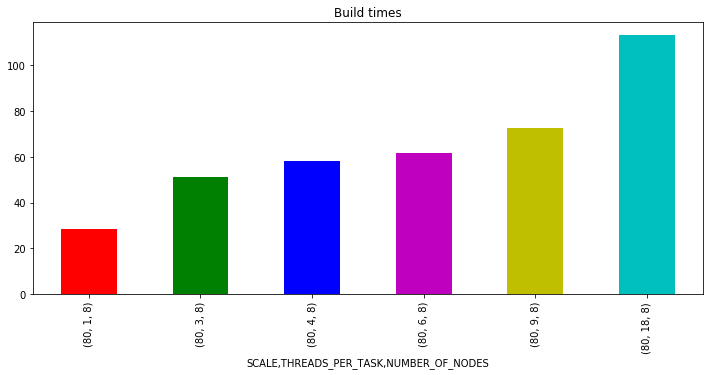

In [31]:
hpc_thread_216_res['T_bld'].plot(kind='bar', title='Build times',
                                 color = ['r', 'g', 'b', 'm', 'y', 'c', 'C0', 'C1']*int(len(hpc_thread_216_res)/6),
                                 figsize=(12,5))

## Master before merge of 5G
node = 8, scale=160, thread = 1,3,4,6,9,18

In [242]:
hpc_thread_mf5G_res = pd.read_csv('results/hpc_benchmark_mf5G_daint_strict_thread_all.csv')
# print(hpc_thread_mf5G_res)

hpc_thread_mf5G_res['T_bld_xn'] = hpc_thread_mf5G_res['T_conns_min'] + hpc_thread_mf5G_res['T_ini_max']
hpc_thread_mf5G_res['T_bld_nx'] = hpc_thread_mf5G_res['T_conns_max'] + hpc_thread_mf5G_res['T_ini_min']

hpc_thread_mf5G_res['T_bld'] = hpc_thread_mf5G_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

print(hpc_thread_mf5G_res['T_sim'])

hpc_thread_mf5G_res = pd.pivot_table(hpc_thread_mf5G_res, index=['SCALE', 'THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                     values=['T_bld', 'VSize_sum', 'T_sim'])
hpc_thread_mf5G_res

0    177.89
1    199.93
2       NaN
3    207.34
4    205.37
5    209.08
Name: T_sim, dtype: float64


T_bld   T_sim    VSize_sum
SCALE THREADS_PER_TASK NUMBER_OF_NODES                            
160   1                8                63.39  177.89  958799676.0
      3                8                83.30  199.93  867065712.0
      4                8                  NaN     NaN          NaN
      6                8                89.79  207.34  855381360.0
      9                8                87.20  205.37  852435352.0
      18               8                90.25  209.08  849617496.0

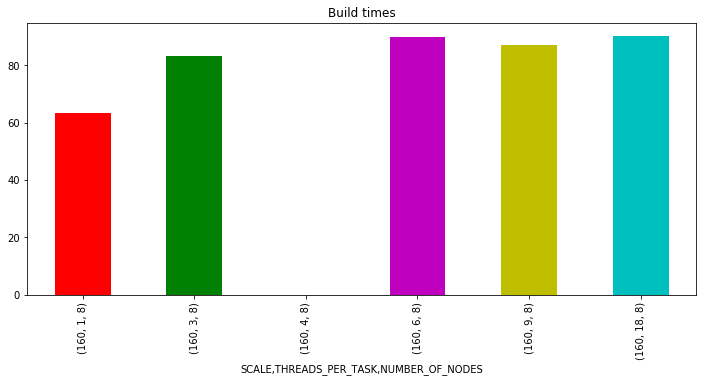

In [243]:
hpc_thread_mf5G_res['T_bld'].plot(kind='bar', title='Build times',
                                  color = ['r', 'g', 'b', 'm', 'y', 'c', 'C0', 'C1']*int(len(hpc_thread_mf5G_res)/6),
                                  figsize=(12,5))

### hpc - stripped, only EE Connections

In [186]:
hpc_thread_stripped_res = pd.read_csv('results/hpc_benchmark_2_16_1_daint_strict_stripped.csv')
# print(hpc_thread_216_res)

hpc_thread_stripped_res['T_bld_xn'] = hpc_thread_stripped_res['T_conns_min'] + hpc_thread_stripped_res['T_ini_max']
hpc_thread_stripped_res['T_bld_nx'] = hpc_thread_stripped_res['T_conns_max'] + hpc_thread_stripped_res['T_ini_min']

hpc_thread_stripped_res['T_bld'] = hpc_thread_stripped_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

print(hpc_thread_stripped_res['T_sim'])

hpc_thread_stripped_res = pd.pivot_table(hpc_thread_stripped_res, index=['SCALE', 'THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                    values=['T_bld', 'VSize_sum', 'T_sim', 'T_conns_min', 'T_ini_min'])
hpc_thread_stripped_res

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: T_sim, dtype: float64


T_bld  T_conns_min  T_ini_min
SCALE THREADS_PER_TASK NUMBER_OF_NODES                                
160   1                8                205.85        15.91     188.95
      3                8                283.18        27.10     249.90
      4                8                317.36        34.24     278.72
      6                8                321.26        37.72     280.55
      9                8                322.77        42.54     276.73
      18               8                395.19        58.16     327.45

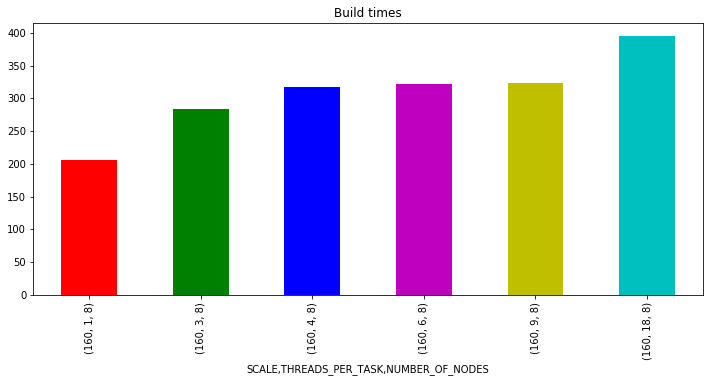

In [187]:
hpc_thread_stripped_res['T_bld'].plot(kind='bar', title='Build times',
                                      color = ['r', 'g', 'b', 'm', 'y', 'c', 'C0', 'C1']*int(len(hpc_thread_stripped_res)/6),
                                      figsize=(12,5))

## Figure 4

### NEST 2.16.1

In [181]:
#fig4_2_16_1_res = pd.read_csv('results/hpc_benchmark_2_16_1_daint_strict_fig4.csv')
#fig4_2_16_1_res['version'] = ['2.16.1']*6
#fig4_5g_res = pd.read_csv('results/hpc_benchmark_f104c6d_daint_strict_fig4.csv')
#fig4_5g_res['version'] = ['5g']*6

#fig4_res = pd.concat([fig4_2_16_1_res, fig4_5g_res])
fig4_res = pd.read_csv('results/hpc_benchmark_2_16_1_daint_strict_fig4.csv')
#print(fig4_res)

fig4_res['T_bld_xn'] = fig4_res['T_conns_min'] + fig4_res['T_ini_max']
fig4_res['T_bld_nx'] = fig4_res['T_conns_max'] + fig4_res['T_ini_min']

fig4_res['T_bld'] = fig4_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

print(fig4_res['T_sim'])

fig4_pres = pd.pivot_table(fig4_res, index=['THREADS_PER_TASK'],
                          values=['T_bld', 'VSize_sum', 'T_sim', 'T_conns_min', 'T_ini_min'])
fig4_pres

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  NUM_VPS  SCALE  PLASTIC  \
0                1               1                 1      NaN     15     True   
1                1               1                 3      NaN     15     True   
2                1               1                 6      NaN     15     True   
3                1               1                 9      NaN     15     True   
4                1               1                18      NaN     15     True   
5                1               1                36      NaN     15     True   

   T_nrns  T_conns_min  T_conns_max  T_ini_min  T_ini_max  T_equ   T_sim  \
0    0.97          NaN          NaN        NaN        NaN    NaN     NaN   
1    0.97       302.93       302.93     226.92     226.92  17.55  200.63   
2    1.15       218.14       218.14     158.67     158.67  13.13  153.66   
3    1.26       174.53       174.53     133.22     133.22  38.15  551.23   
4    1.26       122.11       122.11     103.37     1

,T_bld,T_conns_min,T_ini_min,T_sim,VSize_sum
THREADS_PER_TASK,,,,,
1,NaN,NaN,NaN,NaN,NaN
3,529.85,302.93,226.92,200.63,82409516.0
6,376.81,218.14,158.67,153.66,82555960.0
9,307.75,174.53,133.22,551.23,75425860.0
18,225.48,122.11,103.37,368.62,75410536.0
36,203.77,109.40,94.37,199.92,75082940.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf5ebb4978>,
      dtype=object)

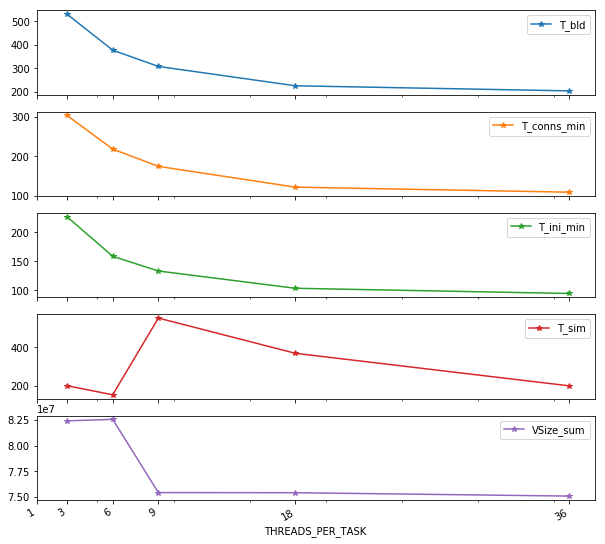

In [150]:
ax_2_16_1 = fig4_pres.plot(kind='line', title='', subplots=True, xticks=[1,3,6,9,18,36],
              style=['-*','-*','-*','-*','-*'], figsize=(10,10))
ax_2_16_1

0     196.23
1     200.61
2     164.56
3     153.97
4     144.33
5     178.30
6     553.30
7     628.10
8     586.59
9     533.08
10    494.59
Name: T_sim, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf4ee26908>,
      dtype=object)

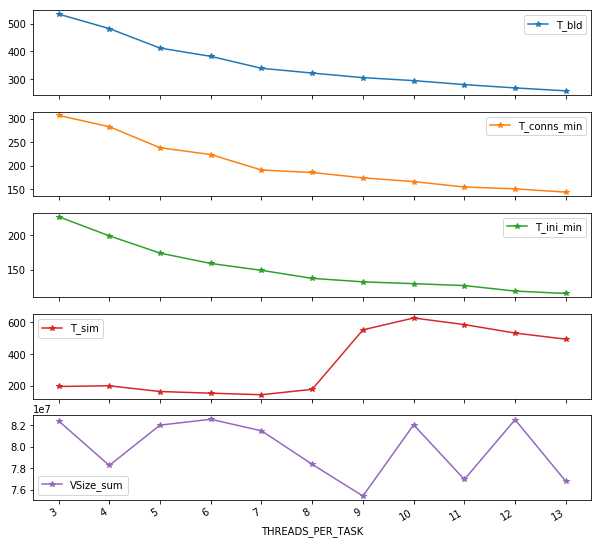

In [230]:
fig4_all_threads_res = pd.read_csv('results/hpc_benchmark_2_16_1_daint_strict_thread_3456789.csv')
#print(fig4_all_threads_res)

fig4_all_threads_res['T_bld_xn'] = fig4_all_threads_res['T_conns_min'] + fig4_all_threads_res['T_ini_max']
fig4_all_threads_res['T_bld_nx'] = fig4_all_threads_res['T_conns_max'] + fig4_all_threads_res['T_ini_min']

fig4_all_threads_res['T_bld'] = fig4_all_threads_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

print(fig4_all_threads_res['T_sim'])

fig4_all_threads_res = pd.pivot_table(fig4_all_threads_res, index=['THREADS_PER_TASK'],
                                      values=['T_bld', 'VSize_sum', 'T_sim', 'T_conns_min', 'T_ini_min'])
fig4_all_threads_res

fig4_all_threads_res.plot(kind='line', title='', subplots=True, xticks=[3,4,5,6,7,8,9,10,11,12,13],
                          style=['-*','-*','-*','-*','-*'], figsize=(10,10))

## 5g

In [146]:
#fig4_2_16_1_res = pd.read_csv('results/hpc_benchmark_2_16_1_daint_strict_fig4.csv')
#fig4_2_16_1_res['version'] = ['2.16.1']*6
#fig4_5g_res = pd.read_csv('results/hpc_benchmark_f104c6d_daint_strict_fig4.csv')
#fig4_5g_res['version'] = ['5g']*6

#fig4_res = pd.concat([fig4_2_16_1_res, fig4_5g_res])
fig4_5g_res = pd.read_csv('results/hpc_benchmark_f104c6d_daint_strict_fig4.csv')
#print(fig4_res)

fig4_5g_res['T_bld_xn'] = fig4_5g_res['T_conns_min'] + fig4_5g_res['T_ini_max']
fig4_5g_res['T_bld_nx'] = fig4_5g_res['T_conns_max'] + fig4_5g_res['T_ini_min']

fig4_5g_res['T_bld'] = fig4_5g_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

print(fig4_5g_res['T_sim'])

fig4_5g_pres = pd.pivot_table(fig4_5g_res, index=['THREADS_PER_TASK'],
                             values=['T_bld', 'VSize_sum', 'T_sim', 'T_conns_min', 'T_ini_min'])
fig4_5g_pres

                   T_bld  T_conns_min  T_ini_min   T_sim   VSize_sum
THREADS_PER_TASK                                                    
1                    NaN          NaN        NaN     NaN         NaN
3                 529.85       302.93     226.92  200.63  82409516.0
6                 376.81       218.14     158.67  153.66  82555960.0
9                 307.75       174.53     133.22  551.23  75425860.0
18                225.48       122.11     103.37  368.62  75410536.0
36                203.77       109.40      94.37  199.92  75082940.0
0       NaN
1    217.68
2    152.12
3    557.17
4    379.76
5    207.83
Name: T_sim, dtype: float64


,T_bld,T_conns_min,T_ini_min,T_sim,VSize_sum
THREADS_PER_TASK,,,,,
1,NaN,NaN,NaN,NaN,NaN
3,441.37,237.51,203.86,217.68,113819704.0
6,315.59,174.57,141.02,152.12,113901124.0
9,247.91,127.39,120.52,557.17,123352144.0
18,184.69,87.96,96.73,379.76,123526260.0
36,156.21,63.32,92.89,207.83,123792584.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf5efa0d68>,
      dtype=object)

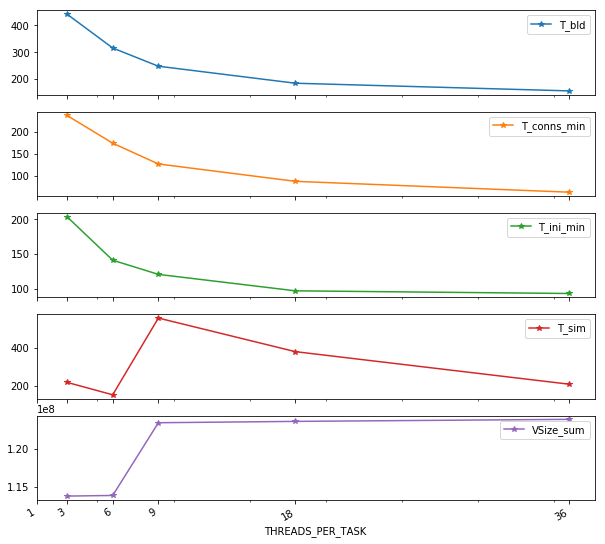

In [143]:
fig4_5g_pres.plot(kind='line', title='', subplots=True, xticks=[1,3,6,9,18,36],
                 style=['-*','-*','-*','-*','-*'], figsize=(10,10))

/home/stine/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


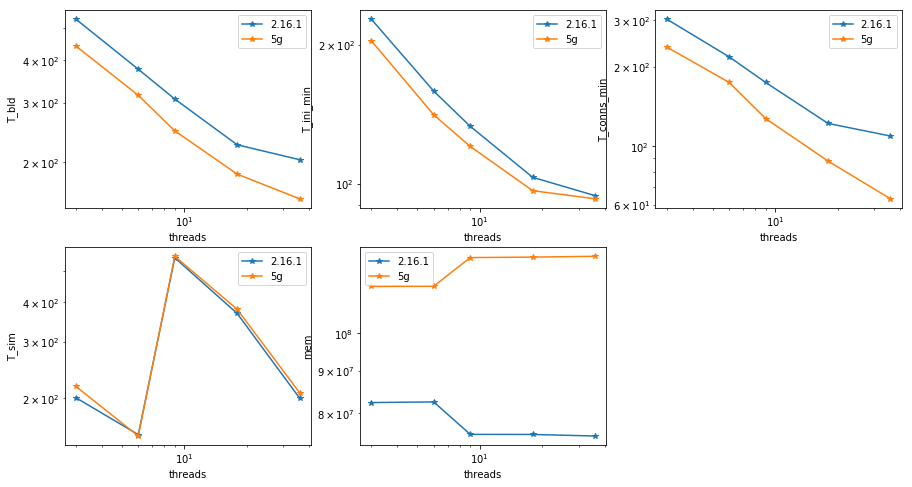

In [182]:
plt.figure(figsize=(15,8))

plt.subplot(231)
plt.loglog(fig4_res['THREADS_PER_TASK'], fig4_res['T_bld'], '-*', label='2.16.1')
plt.loglog(fig4_5g_res['THREADS_PER_TASK'], fig4_5g_res['T_bld'], '-*',label='5g')
plt.ylabel('T_bld')
plt.xlabel('threads')
plt.legend()

plt.subplot(232)
plt.loglog(fig4_res['THREADS_PER_TASK'], fig4_res['T_ini_min'], '-*', label='2.16.1')
plt.loglog(fig4_5g_res['THREADS_PER_TASK'], fig4_5g_res['T_ini_min'], '-*',label='5g')
plt.ylabel('T_ini_min')
plt.xlabel('threads')
plt.legend()

plt.subplot(233)
plt.loglog(fig4_res['THREADS_PER_TASK'], fig4_res['T_conns_min'], '-*', label='2.16.1')
plt.loglog(fig4_5g_res['THREADS_PER_TASK'], fig4_5g_res['T_conns_min'], '-*',label='5g')
plt.ylabel('T_conns_min')
plt.xlabel('threads')
plt.legend()

plt.subplot(234)
plt.loglog(fig4_res['THREADS_PER_TASK'], fig4_res['T_sim'], '-*', label='2.16.1')
plt.loglog(fig4_5g_res['THREADS_PER_TASK'], fig4_5g_res['T_sim'], '-*',label='5g')
plt.ylabel('T_sim')
plt.xlabel('threads')
plt.legend()

plt.subplot(235)
plt.loglog(fig4_res['THREADS_PER_TASK'], fig4_res['VSize_sum'], '-*', label='2.16.1')
plt.loglog(fig4_5g_res['THREADS_PER_TASK'], fig4_5g_res['VSize_sum'], '-*',label='5g')
plt.ylabel('mem')
plt.xlabel('threads')
plt.legend()

## 5G node=8, vp=36, scale=160, thread = 1, 3, 4, 6, 9, 18

There is something strange here, N_spks_sum is not constant over all the threads like it should.

In [185]:
hpc_thread_5g_res = pd.read_csv('results/hpc_benchmark_f104c6d_daint_strict_thread_all.csv')
print(hpc_thread_5g_res)

hpc_thread_5g_res['T_bld_xn'] = hpc_thread_5g_res['T_conns_min'] + hpc_thread_5g_res['T_ini_max']
hpc_thread_5g_res['T_bld_nx'] = hpc_thread_5g_res['T_conns_max'] + hpc_thread_5g_res['T_ini_min']

hpc_thread_5g_res['T_bld'] = hpc_thread_5g_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

print(hpc_thread_5g_res['T_sim'])

hpc_thread_5g_res = pd.pivot_table(hpc_thread_5g_res, index=['SCALE', 'THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                   values=['T_bld', 'VSize_sum', 'T_sim'])
hpc_thread_5g_res

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  NUM_VPS  SCALE  PLASTIC  \
0                8              36                 1      288    160     True   
1                8              12                 3      288    160     True   
2                8               9                 4      288    160     True   
3                8               6                 6      288    160     True   
4                8               4                 9      288    160     True   
5                8               2                18      288    160     True   

   T_nrns  T_conns_min  T_conns_max  T_ini_min  T_ini_max  T_equ   T_sim  \
0    0.28        20.50        22.09      28.67      30.26  12.63  260.12   
1    0.39        34.03        43.05      39.39      48.41  16.16  269.92   
2    0.32        43.84        45.49      45.70      47.34  17.28  273.78   
3    0.40        46.56        51.29      52.44      57.18  17.19  278.49   
4    0.52        49.27        51.66      58.12      

T_bld   T_sim   VSize_sum
SCALE THREADS_PER_TASK NUMBER_OF_NODES                            
160   1                8                 50.76  260.12  1321008920
      3                8                 82.44  269.92  1189727512
      4                8                 91.18  273.78  1174305304
      6                8                103.73  278.49  1159651672
      9                8                109.73  276.64  1152208792
      18               8                169.33  283.68  1144559960

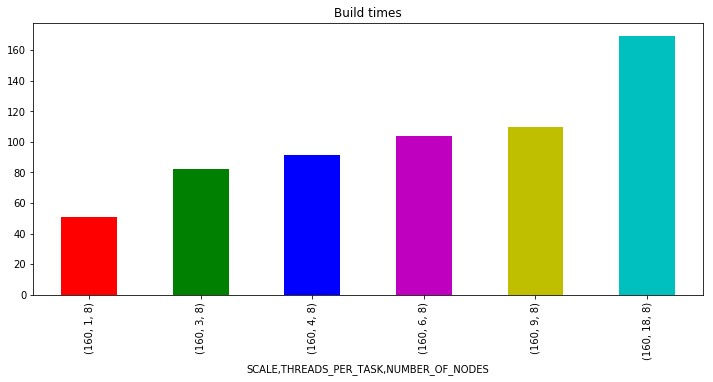

In [184]:
hpc_thread_5g_res['T_bld'].plot(kind='bar', title='Build times',
                                color = ['r', 'g', 'b', 'm', 'y', 'c', 'C0', 'C1']*int(len(hpc_thread_5g_res)/6),
                                figsize=(12,5))

## Stallo vs. Piz-Daint, local_num_threads
1 node, SCALE=5, thread=3,6,9,18

NEST Hash: `91b3fa71`

In [218]:
hpc_stallo = pd.read_csv('results/hpc_benchmark_2_16_1_stallo_strict_spikes.csv')
hpc_stallo['version'] = ['stallo']*5
hpc_daint = pd.read_csv('results/hpc_benchmark_2_16_1_daint_strict_spikes.csv')
hpc_daint['version'] = ['daint']*5

hpc_spikes_res = pd.concat([hpc_stallo, hpc_daint])

#print(hpc_spikes_res)

hpc_spikes_res['T_bld_xn'] = hpc_spikes_res['T_conns_min'] + hpc_spikes_res['T_ini_max']
hpc_spikes_res['T_bld_nx'] = hpc_spikes_res['T_conns_max'] + hpc_spikes_res['T_ini_min']

hpc_spikes_res['T_bld'] = hpc_spikes_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

print(hpc_spikes_res['T_sim'])

hpc_spikes_res = pd.pivot_table(hpc_spikes_res, index=['SCALE', 'THREADS_PER_TASK', 'version', 'NUMBER_OF_NODES'],
                                values=['N_spks_sum', 'Rate_sum', 'N_nrns', 'T_bld', 'VSize_sum', 'T_sim'])
hpc_spikes_res

0    219.77
1    113.29
2     87.01
3     48.14
4       NaN
0    342.90
1    184.57
2    125.33
3     67.46
4     35.78
Name: T_sim, dtype: float64


N_nrns  N_spks_sum  Rate_sum  \
SCALE THREADS_PER_TASK version NUMBER_OF_NODES                                  
5     3                daint   1                56250.0    717433.0    12.680   
                       stallo  1                56250.0    717433.0    12.680   
      6                daint   1                56250.0    728286.0    12.920   
                       stallo  1                56250.0    728286.0    12.920   
      9                daint   1                56250.0    719661.0    12.756   
                       stallo  1                56250.0    719661.0    12.756   
      18               daint   1                56250.0    707425.0    12.610   
                       stallo  1                56250.0    707425.0    12.610   
      36               daint   1                56250.0    709314.0    12.555   
                       stallo  1                    NaN         NaN       NaN   

                                                T_bld   T_sim   VSize_sum  
SCALE THREADS_PER_TASK version NUMBER_OF_NODES                             
5     3                daint   1                87.47  342.90  13164588.0  
                       stallo  1                75.07  219.77  13275964.0  
      6                daint   1                62.04  184.57  13214776.0  
                       stallo  1                49.87  113.29  13688648.0  
      9                daint   1                50.24  125.33  13436996.0  
                       stallo  1                47.51   87.01  13517652.0  
      18               daint   1                40.48   67.46  13382760.0  
                       stallo  1                45.69   48.14  13627256.0  
      36               daint   1                33.02   35.78  13696188.0  
                       stallo  1                  NaN     NaN         NaN

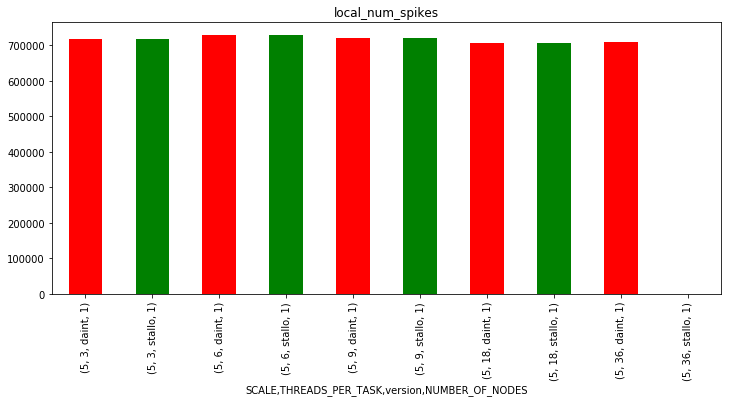

In [219]:
hpc_spikes_res['N_spks_sum'].plot(kind='bar', title='local_num_spikes',
                                  color = ['r', 'g']*int(len(hpc_spikes_res)/2),
                                  figsize=(12,5))

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  NUM_VPS  SCALE  PLASTIC  \
0                1               1                 3      NaN      5     True   
1                1               1                 6      NaN      5     True   
2                1               1                 9      NaN      5     True   
3                1               1                18      NaN      5     True   
4                1               1                36      NaN      5     True   

   T_nrns  T_conns_min  T_conns_max  T_ini_min  ...    N_spks_sum  Rate_sum  \
0    0.34        50.45        50.45      37.02  ...        717433    12.680   
1    0.54        36.14        36.14      25.90  ...        728286    12.920   
2    0.44        28.94        28.94      21.30  ...        719661    12.756   
3    0.47        23.75        23.75      16.73  ...        707425    12.610   
4    0.69        18.05        18.05      14.97  ...        709314    12.555   

   N_nrns  N_conns_sum  d_min  d_max  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf540e76d8>,
      dtype=object)

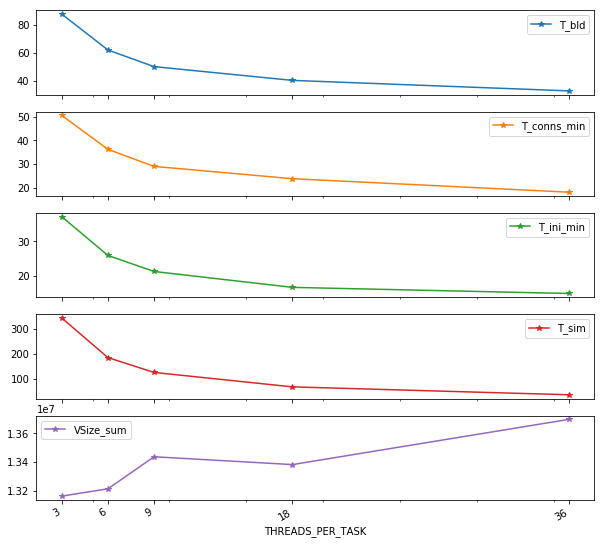

In [224]:
print(hpc_daint)

hpc_daint['T_bld_xn'] = hpc_daint['T_conns_min'] + hpc_daint['T_ini_max']
hpc_daint['T_bld_nx'] = hpc_daint['T_conns_max'] + hpc_daint['T_ini_min']

hpc_daint['T_bld'] = hpc_daint[['T_bld_xn', 'T_bld_nx']].min(axis=1)

hpc_daint_pres = pd.pivot_table(hpc_daint, index=['THREADS_PER_TASK'],
                            values=['T_bld', 'VSize_sum', 'T_sim', 'T_conns_min', 'T_ini_min'])

hpc_daint_pres.plot(kind='line', title='', subplots=True, xticks=[3,6,9,18,36],
                    style=['-*','-*','-*','-*','-*'], figsize=(10,10))

In [221]:
hpc_stallo['T_bld_xn'] = hpc_stallo['T_conns_min'] + hpc_stallo['T_ini_max']
hpc_stallo['T_bld_nx'] = hpc_stallo['T_conns_max'] + hpc_stallo['T_ini_min']

hpc_stallo['T_bld'] = hpc_stallo[['T_bld_xn', 'T_bld_nx']].min(axis=1)

hpc_stallo_pres = pd.pivot_table(hpc_stallo, index=['THREADS_PER_TASK'],
                            values=['T_bld', 'VSize_sum', 'T_sim', 'T_conns_min', 'T_ini_min'])

/home/stine/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


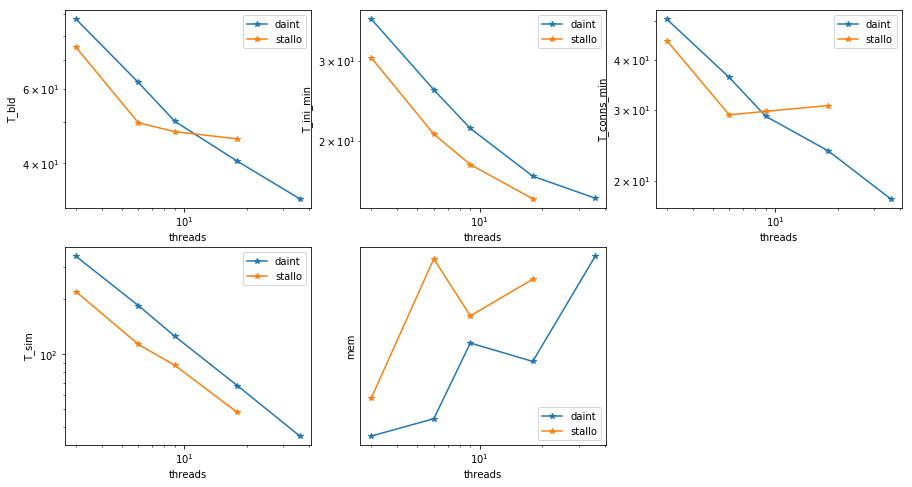

In [222]:
plt.figure(figsize=(15,8))

plt.subplot(231)
plt.loglog(hpc_daint['THREADS_PER_TASK'], hpc_daint['T_bld'], '-*', label='daint')
plt.loglog(hpc_stallo['THREADS_PER_TASK'], hpc_stallo['T_bld'], '-*',label='stallo')
plt.ylabel('T_bld')
plt.xlabel('threads')
plt.legend()

plt.subplot(232)
plt.loglog(hpc_daint['THREADS_PER_TASK'], hpc_daint['T_ini_min'], '-*', label='daint')
plt.loglog(hpc_stallo['THREADS_PER_TASK'], hpc_stallo['T_ini_min'], '-*',label='stallo')
plt.ylabel('T_ini_min')
plt.xlabel('threads')
plt.legend()

plt.subplot(233)
plt.loglog(hpc_daint['THREADS_PER_TASK'], hpc_daint['T_conns_min'], '-*', label='daint')
plt.loglog(hpc_stallo['THREADS_PER_TASK'], hpc_stallo['T_conns_min'], '-*',label='stallo')
plt.ylabel('T_conns_min')
plt.xlabel('threads')
plt.legend()

plt.subplot(234)
plt.loglog(hpc_daint['THREADS_PER_TASK'], hpc_daint['T_sim'], '-*', label='daint')
plt.loglog(hpc_stallo['THREADS_PER_TASK'], hpc_stallo['T_sim'], '-*',label='stallo')
plt.ylabel('T_sim')
plt.xlabel('threads')
plt.legend()

plt.subplot(235)
plt.loglog(hpc_daint['THREADS_PER_TASK'], hpc_daint['VSize_sum'], '-*', label='daint')
plt.loglog(hpc_stallo['THREADS_PER_TASK'], hpc_stallo['VSize_sum'], '-*',label='stallo')
plt.ylabel('mem')
plt.xlabel('threads')
plt.legend()

## Thread analyse

In [229]:
hpc_spikes_res = pd.read_csv('results/hpc_benchmark_2_16_1_daint_strict_fig4_few_threads.csv')
print(hpc_spikes_res)

hpc_spikes_res['T_bld_xn'] = hpc_spikes_res['T_conns_min'] + hpc_spikes_res['T_ini_max']
hpc_spikes_res['T_bld_nx'] = hpc_spikes_res['T_conns_max'] + hpc_spikes_res['T_ini_min']

hpc_spikes_res['T_bld'] = hpc_spikes_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

print(hpc_spikes_res['T_sim'])

hpc_spikes_res = pd.pivot_table(hpc_spikes_res, index=['SCALE', 'THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                values=['N_spks_sum', 'Rate_sum', 'N_nrns', 'T_bld', 'VSize_sum', 'T_sim'])
hpc_spikes_res

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  NUM_VPS  SCALE  PLASTIC  \
0                1               1                 1      NaN      5     True   
1                1               1                 3      NaN      5     True   
2                1               1                18      NaN      5     True   

   T_nrns  T_conns_min  T_conns_max  T_ini_min  T_ini_max  T_equ   T_sim  \
0    0.34        84.32        84.32      64.55      64.55   8.50  105.91   
1    0.35        50.76        50.76      37.33      37.33  24.28  342.65   
2    0.48        22.57        22.57      16.75      16.75   4.36   67.90   

   VSize_sum  N_spks_sum  Rate_sum  N_nrns  N_conns_sum  d_min  d_max  
0   13697060       98961     1.289   56250    316463500    1.5    1.5  
1   13164588      717433    12.680   56250    316463500    1.5    1.5  
2   13382760      707425    12.610   56250    316463500    1.5    1.5  
0    105.91
1    342.65
2     67.90
Name: T_sim, dtype: float64


N_nrns  N_spks_sum  Rate_sum   T_bld  \
SCALE THREADS_PER_TASK NUMBER_OF_NODES                                         
5     1                1                 56250       98961     1.289  148.87   
      3                1                 56250      717433    12.680   88.09   
      18               1                 56250      707425    12.610   39.32   

                                         T_sim  VSize_sum  
SCALE THREADS_PER_TASK NUMBER_OF_NODES                     
5     1                1                105.91   13697060  
      3                1                342.65   13164588  
      18               1                 67.90   13382760

## NEST 2.16.1 vs NEST 2.14 vs 5G Spike data

In [239]:
hpc_spikes_2_16_1_res = pd.read_csv('results/hpc_benchmark_2_16_1_daint_strict_spikes.csv')
hpc_spikes_2_16_1_res['version'] = ['2.16.1']*2
hpc_spikes_2_14_res = pd.read_csv('results/hpc_benchmark_2_14_daint_strict_spikes.csv')
#print(hpc_spikes_2_14_res)
hpc_spikes_2_14_res['version'] = ['2.14']*2
hpc_spikes_5g_res = pd.read_csv('results/hpc_benchmark_f104c6d_daint_strict_spikes.csv')
hpc_spikes_5g_res['version'] = ['5g']*2

hpc_spikes_res = pd.concat([hpc_spikes_2_16_1_res, hpc_spikes_2_14_res, hpc_spikes_5g_res])
#print(hpc_spikes_res)

hpc_spikes_res['T_bld_xn'] = hpc_spikes_res['T_conns_min'] + hpc_spikes_res['T_ini_max']
hpc_spikes_res['T_bld_nx'] = hpc_spikes_res['T_conns_max'] + hpc_spikes_res['T_ini_min']

hpc_spikes_res['T_bld'] = hpc_spikes_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

#print(hpc_spikes_res['T_sim'])

hpc_spikes_res = pd.pivot_table(hpc_spikes_res, index=['SCALE', 'THREADS_PER_TASK', 'version', 'NUMBER_OF_NODES'],
                                values=['N_spks_sum', 'Rate_sum', 'N_nrns', 'T_bld', 'VSize_sum', 'T_sim'])
hpc_spikes_res

N_nrns  N_spks_sum  Rate_sum  \
SCALE THREADS_PER_TASK version NUMBER_OF_NODES                                 
5     1                2.14    1                 56250      717019   786.635   
                       2.16.1  1                 56250       98961   109.696   
                       5g      1                 56250       98961   109.696   
      3                2.14    1                 56250      731453   803.395   
                       2.16.1  1                 56250      717433   788.055   
                       5g      1                 56250      731453   803.801   

                                                 T_bld   T_sim  VSize_sum  
SCALE THREADS_PER_TASK version NUMBER_OF_NODES                             
5     1                2.14    1                113.02  620.40   11539452  
                       2.16.1  1                150.98  104.92   16347172  
                       5g      1                128.58  128.10   19158064  
      3                2.14    1                 62.02  319.85   12344324  
                       2.16.1  1                 90.78  333.87   15671340  
                       5g      1                 72.39  425.21   20773944

**Spike data:**

| thread | 2.14 | 2.16.1 | 5g |
|--------|------|--------|----|
|    1   |786635| 109696 |109696|
|    3   |803395| 788055 |803801|

In [3]:
hpc_spikes_2_16_1_seed_res = pd.read_csv('results/hpc_benchmark_2_16_1_daint_strict_spikes_seed.csv')
hpc_spikes_2_16_1_seed_res['version'] = ['2.16.1']*2
hpc_spikes_2_14_seed_res = pd.read_csv('results/hpc_benchmark_2_14_daint_strict_spikes_seed.csv')
#print(hpc_spikes_2_14_seed_res)
hpc_spikes_2_14_seed_res['version'] = ['2.14']*2
hpc_spikes_5g_seed_res = pd.read_csv('results/hpc_benchmark_f104c6d_daint_strict_spikes_seed.csv')
hpc_spikes_5g_seed_res['version'] = ['5g']*2

hpc_spikes_seed_res = pd.concat([hpc_spikes_2_16_1_seed_res, hpc_spikes_2_14_seed_res, hpc_spikes_5g_seed_res])
#print(hpc_spikes_seed_res)

hpc_spikes_seed_res['T_bld_xn'] = hpc_spikes_seed_res['T_conns_min'] + hpc_spikes_seed_res['T_ini_max']
hpc_spikes_seed_res['T_bld_nx'] = hpc_spikes_seed_res['T_conns_max'] + hpc_spikes_seed_res['T_ini_min']

hpc_spikes_seed_res['T_bld'] = hpc_spikes_seed_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

#print(hpc_spikes_res['T_sim'])

hpc_spikes_seed_res = pd.pivot_table(hpc_spikes_seed_res, index=['SCALE', 'THREADS_PER_TASK', 'version', 'NUMBER_OF_NODES'],
                                values=['N_spks_sum', 'Rate_sum', 'N_nrns', 'T_bld', 'VSize_sum', 'T_sim'])
hpc_spikes_seed_res

Empty DataFrame
Columns: []
Index: [(5, 1, 2.14, 1), (5, 1, 2.16.1, 1), (5, 1, 5g, 1), (5, 3, 2.14, 1), (5, 3, 2.16.1, 1), (5, 3, 5g, 1)]

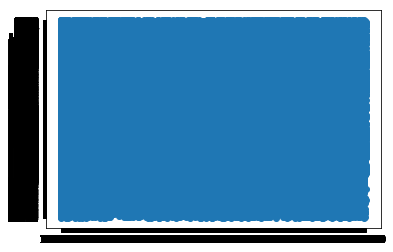

In [5]:
spikes_2_16_1 = pd.read_csv('spike_data/all_spikes_2161_1.gdf')
spikes_2_16_1

with open('spike_data/all_spikes_2161_1.gdf') as f:
    data = f.read()

data = data.split('\n')

gid = [row.split('\t')[0] for row in data]
time = [row.split('\t')[1] for row in data]

plt.plot(time[:100], gid[:100], 'o')

#fig = plt.figure()

#plt.scatter(time, gid)
#plt.show()


# HPC Benchmark - split into many `Connect` calls

We time each EE, EI, IE and II connection group, and add all these times to find total `Connect` time. Here we can also look at Connection/Second.

In [ ]:
hpc_split_res = pd.concat([pd.read_csv(bench)
                           for bench in glob.glob(hpc_split_path)])

In [ ]:
print(hpc_split_res)

**Find total connect time:**

In [ ]:
hpc_split_res['T_bld'] = (hpc_split_res['EE_inner_conn_time'] + hpc_split_res['EI_inner_conn_time']
                          + hpc_split_res['IE_inner_conn_time'] + hpc_split_res['II_inner_conn_time'])

In [ ]:
hpc_split_pres = pd.pivot_table(hpc_split_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                values=['T_bld', 'VSize_sum', 'N_conns_sum', 'EE_conns_per_sec'])

In [ ]:
hpc_split_pres

In [ ]:
hpc_split_pres['T_bld'].plot(kind='bar', title='Connect time',
                             color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))

In [ ]:
hpc_split_pres['VSize_sum'].plot(kind='bar', title='VSize_sum',
                                 color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))

## HPC split - no connect per sec

Here, we have a setup closer to the normal HPC Benchmark, we start timing before first `Connect` call and stop timing when we have done our last `Connect`. The time here is thus total time for *all* EE, EI, IE, II `Connect` groups. It is not possible here to find Connect/second.

In [ ]:
hpc_split_new_res = pd.concat([pd.read_csv(bench)
                               for bench in glob.glob(hpc_split_new_path)])

**Connect time:**

In [ ]:
hpc_split_new_res['T_bld_xn'] = hpc_split_new_res['T_conns_min'] + hpc_split_new_res['T_ini_max']
hpc_split_new_res['T_bld_nx'] = hpc_split_new_res['T_conns_max'] + hpc_split_new_res['T_ini_min']

hpc_split_new_res['T_bld'] = hpc_split_new_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

In [ ]:
hpc_split_new_pres = pd.pivot_table(hpc_split_new_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                    values=['T_bld', 'VSize_sum', 'N_nrns', 'N_conns_sum'])

hpc_split_new_pres

In [ ]:
hpc_split_new_pres['T_bld'].plot(kind='bar', title='Build times',
                                 color = ['r', 'g', 'b', 'm']*int(len(hpc_split_new_pres)/4), figsize=(12,5))

# HPC Benchmark - only `one_to_one` calls

I think `one_to_one` is set up with too few connections, and so the result is not really that good.
It is not possible to compare connection times between the different rules, because we have different number of connections, but it is possible to compare connection/second.

In [ ]:
hpc_one_res = pd.concat([pd.read_csv(bench)
                         for bench in glob.glob(hpc_one_path)])

In [ ]:
print(hpc_one_res)

In [ ]:
hpc_one_res['T_bld'] = hpc_one_res['EE_inner_conn_time'] + hpc_one_res['EI_inner_conn_time'] + hpc_one_res['IE_inner_conn_time'] + hpc_one_res['II_inner_conn_time']

In [ ]:
hpc_one_pres = pd.pivot_table(hpc_one_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                              values=['T_bld', 'VSize_sum', 'N_conns_sum', 'EE_conns_per_sec'])
hpc_one_pres

In [ ]:
hpc_one_pres['T_bld'].plot(kind='bar', title='Build times',
                           color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))

In [ ]:
hpc_one_pres['EE_conns_per_sec'].plot(kind='bar', title='EE conns per sec',
                                      color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3), figsize=(12,5))

# HBC Benchmark - only `fixed_indegree` calls

In [ ]:
hpc_in_res = pd.concat([pd.read_csv(bench)
                        for bench in glob.glob(hpc_in_path)])

In [ ]:
print(hpc_in_res)

In [ ]:
hpc_in_res['T_bld'] = hpc_in_res['EE_inner_conn_time'] + hpc_in_res['EI_inner_conn_time'] + hpc_in_res['IE_inner_conn_time'] + hpc_in_res['II_inner_conn_time']

In [ ]:
hpc_in_pres = pd.pivot_table(hpc_in_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                             values=['T_bld', 'VSize_sum', 'N_conns_sum', 'EE_conns_per_sec'])
hpc_in_pres

In [ ]:
hpc_in_pres['T_bld'].plot(kind='bar', title='Build times',
                          color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))

In [ ]:
hpc_in_pres['EE_conns_per_sec'].plot(kind='bar', title='EE conns per sec',
                                     color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))

### Connections per second for both `one_to_one` and `fixed_indegree`, ex - ex connections:

In [ ]:
hpc_one_in_res = pd.concat([hpc_one_res, hpc_in_res])
hpc_one_in_pres = pd.pivot_table(hpc_one_in_res, index=['RULE','SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                 values=['EE_conns_per_sec'])
hpc_one_in_pres

In [ ]:
hpc_one_in_pres['EE_conns_per_sec'].plot(kind='bar', title='EE conns per sec',
                                         color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3), figsize=(12,5))

# Connections/Second for all `Connect` rules for thread = 4

We had asked for too little time for `fixed_indegree`, `fixed_total_number`, `symmetric_pairwise_bernoulli` and I think `all_to_all`, which results in the NaN values below. Piz Daint is down until tomorrow evening (13th of December), so can't allocate more time until then.

In [ ]:
path_list = [path_string.replace('*', '4') for path_string in
             [hpc_one_path, hpc_all_path, hpc_in_path, hpc_out_path,
              hpc_tot_path, hpc_bern_path, hpc_bern_sym_path]]

connSec_res = pd.concat([pd.read_csv(bench)
                         for bench in path_list])


In [ ]:
print(connSec_res)

In [ ]:
connSec_res['T_bld'] = (connSec_res['EE_inner_conn_time'] + connSec_res['EI_inner_conn_time']
                        + connSec_res['IE_inner_conn_time'] + connSec_res['II_inner_conn_time'])

In [ ]:
connSec_pres = pd.pivot_table(connSec_res, index=['RULE', 'SCALE', 'NUMBER_OF_NODES'],
                              values=['T_bld', 'VSize_sum', 'N_conns_sum', 'EE_conns_per_sec', 'EI_conns_per_sec'])
connSec_pres

In [ ]:
connSec_pres['EE_conns_per_sec'].plot(kind='bar', title='EE conns per sec',
                                      color = ['r', 'g', 'b', 'm', 'y']*int(len(connSec_pres)/5), figsize=(12,5))

In [ ]:
connSec_pres['EI_conns_per_sec'].plot(kind='bar', title='EI conns per sec',
                                      color = ['r', 'g', 'b', 'm', 'y']*int(len(connSec_pres)/5), figsize=(12,5))

In [ ]:
connSec_pres['T_bld'].plot(kind='bar', title='T_bld',
                             color = ['r', 'g', 'b', 'm', 'y']*int(len(connSec_pres)/5), figsize=(12,5))

In [ ]:
connSec_pres['VSize_sum'].plot(kind='bar', title='VSize_sum',
                               color = ['r', 'g', 'b', 'm', 'y']*int(len(connSec_pres)/5), figsize=(12,5))

# REALISTIC MODELS

# Multi-Area-Model
Currently only have results for 4, 8, 12 threads

In [53]:
mam_res = pd.concat([pd.read_csv(bench)
                     for bench in glob.glob(mam_path)])

In [54]:
print(mam_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  NUM_VPS  THREADS_PER_TASK   SCALE  \
0                1               6       24                 4  0.0625   
1                2               6       48                 4  0.1250   
2                4               6       96                 4  0.2500   
3                8               6      192                 4  0.5000   
4               16               6      384                 4  1.0000   
0                1               3       24                 8  0.0625   
1                2               3       48                 8  0.1250   
2                4               3       96                 8  0.2500   
3                8               3      192                 8  0.5000   
4               16               3      384                 8  1.0000   
0                1               2       24                12  0.0625   
1                2               2       48                12  0.1250   
2                4               2       96        

In [55]:
mam_pres = pd.pivot_table(mam_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                          values=['T_connect_avg', 'VSize_sum', 'N_conns_sum'])

In [56]:
mam_pres

N_conns_sum  T_connect_avg  \
SCALE  THREADS_PER_TASK NUMBER_OF_NODES                               
0.0625 4                1                   94756223       8.303144   
       8                1                   94756223       9.558792   
       12               1                   94756223      10.672376   
0.1250 4                2                  378005043      14.137301   
       8                2                  378005043      16.970994   
       12               2                  378005043      17.811317   
0.2500 4                4                 1509968177      25.409213   
       8                4                 1509968177      30.562368   
       12               4                 1509968177      32.847020   
0.5000 4                8                 6035755838      48.192471   
       8                8                 6035755838      57.141467   
       12               8                 6035755838      61.521174   
1.0000 4                16               24134776576      90.925531   
       8                16               24134776576     107.590100   
       12               16               24134776576     114.698663   

                                          VSize_sum  
SCALE  THREADS_PER_TASK NUMBER_OF_NODES              
0.0625 4                1                  29724120  
       8                1                  26854488  
       12               1                  25748196  
0.1250 4                2                  70496096  
       8                2                  64343736  
       12               2                  61441836  
0.2500 4                4                 185137768  
       8                4                 174597844  
       12               4                 167763380  
0.5000 4                8                 548592472  
       8                8                 514205756  
       12               8                 474101912  
1.0000 4                16               1781781752  
       8                16               1532650104  
       12               16               1486488184

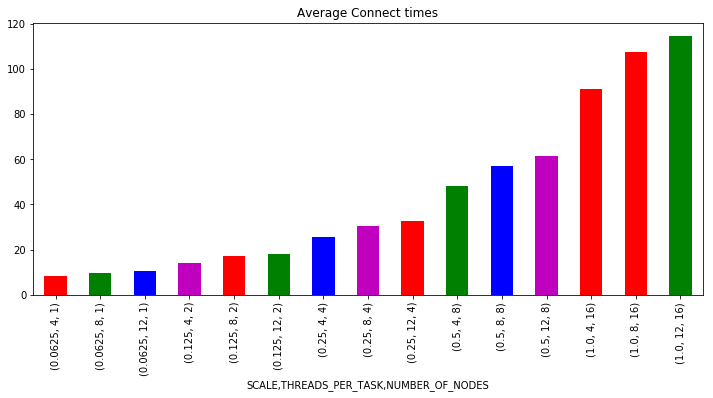

In [58]:
mam_pres['T_connect_avg'].plot(kind='bar', title='Average Connect times',
                               color = ['r', 'g', 'b', 'm']*int(len(mam_pres)/4), figsize=(12,5))

In [ ]:
mam_pres['VSize_sum'].plot(kind='bar', title='VSizeSum',
                           color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))

# 4x4 mesocircuit

In [ ]:
meso_res = pd.concat([pd.read_csv(bench)
                      for bench in glob.glob(mesocircuit_path)])

In [ ]:
print(meso_res)

In [ ]:
meso_pres = pd.pivot_table(meso_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                           values=['T_conns_avg', 'VSize_sum', 'N_conns_sum'])

In [ ]:
meso_pres

In [ ]:
meso_pres['T_conns_avg'].plot(kind='bar', title='Average Connect times',
                              color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))

In [ ]:
meso_pres['VSize_sum'].plot(kind='bar', title='VSize_sum',
                            color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))